In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [263]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/TITAN.csv")

In [264]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TITAN,EQ,144.95,146.0,156.45,146.0,155.00,155.70,154.36,23000,3.550370e+11,NaN,NaN,NaN
1,2000-01-04,TITAN,EQ,155.70,152.0,152.00,144.0,148.05,147.40,146.72,26300,3.858700e+11,NaN,NaN,NaN
2,2000-01-05,TITAN,EQ,147.40,144.0,148.80,136.0,139.95,138.40,142.95,20600,2.944850e+11,NaN,NaN,NaN
3,2000-01-06,TITAN,EQ,138.40,142.0,149.50,141.0,149.50,149.50,147.87,31600,4.672750e+11,NaN,NaN,NaN
4,2000-01-07,TITAN,EQ,149.50,149.5,153.00,145.0,147.75,146.35,148.63,36600,5.439965e+11,NaN,NaN,NaN


In [265]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [266]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.792000e+03,4792.000000
mean,709.230692,709.989926,723.312816,696.430767,709.449114,709.484499,710.415443,1.172596e+06,7.796053e+13,47241.859935,4.408763e+05,0.367944
std,785.170900,785.435092,799.085424,772.183889,784.995523,785.206121,786.266584,1.763858e+06,1.378542e+14,43331.439701,7.022005e+05,0.164969
min,27.500000,27.000000,28.800000,27.000000,27.750000,27.500000,27.880000,2.000000e+02,8.125000e+08,993.000000,3.600000e+02,0.023600
25%,192.262500,192.625000,198.800000,189.500000,192.837500,193.412500,194.245000,9.867325e+04,4.299007e+12,18126.500000,4.992600e+04,0.249000
50%,396.150000,398.250000,404.525000,391.125000,397.025000,396.350000,398.095000,5.491360e+05,2.785515e+13,35076.500000,2.012115e+05,0.352400
75%,1017.725000,1018.925000,1046.500000,991.187500,1020.000000,1019.000000,1016.790000,1.630698e+06,8.382494e+13,63520.250000,6.247118e+05,0.472900
max,4714.600000,4730.000000,4754.950000,4559.900000,4734.000000,4714.600000,4647.540000,3.327661e+07,2.451345e+15,536406.000000,2.169911e+07,1.000000


In [267]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [268]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [269]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [270]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [271]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [272]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [273]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5301,1.679009,0.670068,1479.85,1020499,NaN
5302,1.454116,0.680135,1495.10,1145908,NaN
5303,1.555273,0.255814,1508.85,1037771,NaN
5304,2.037408,-1.128609,1506.80,1927546,NaN
5305,3.096533,-0.556667,1491.65,3691399,NaN


In [274]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_9868\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [275]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [276]:
#Define the prediction model
model = RandomForestRegressor()

In [277]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [278]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9508763826836713


In [279]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [280]:
predictions = model.predict(X_Check)

In [281]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

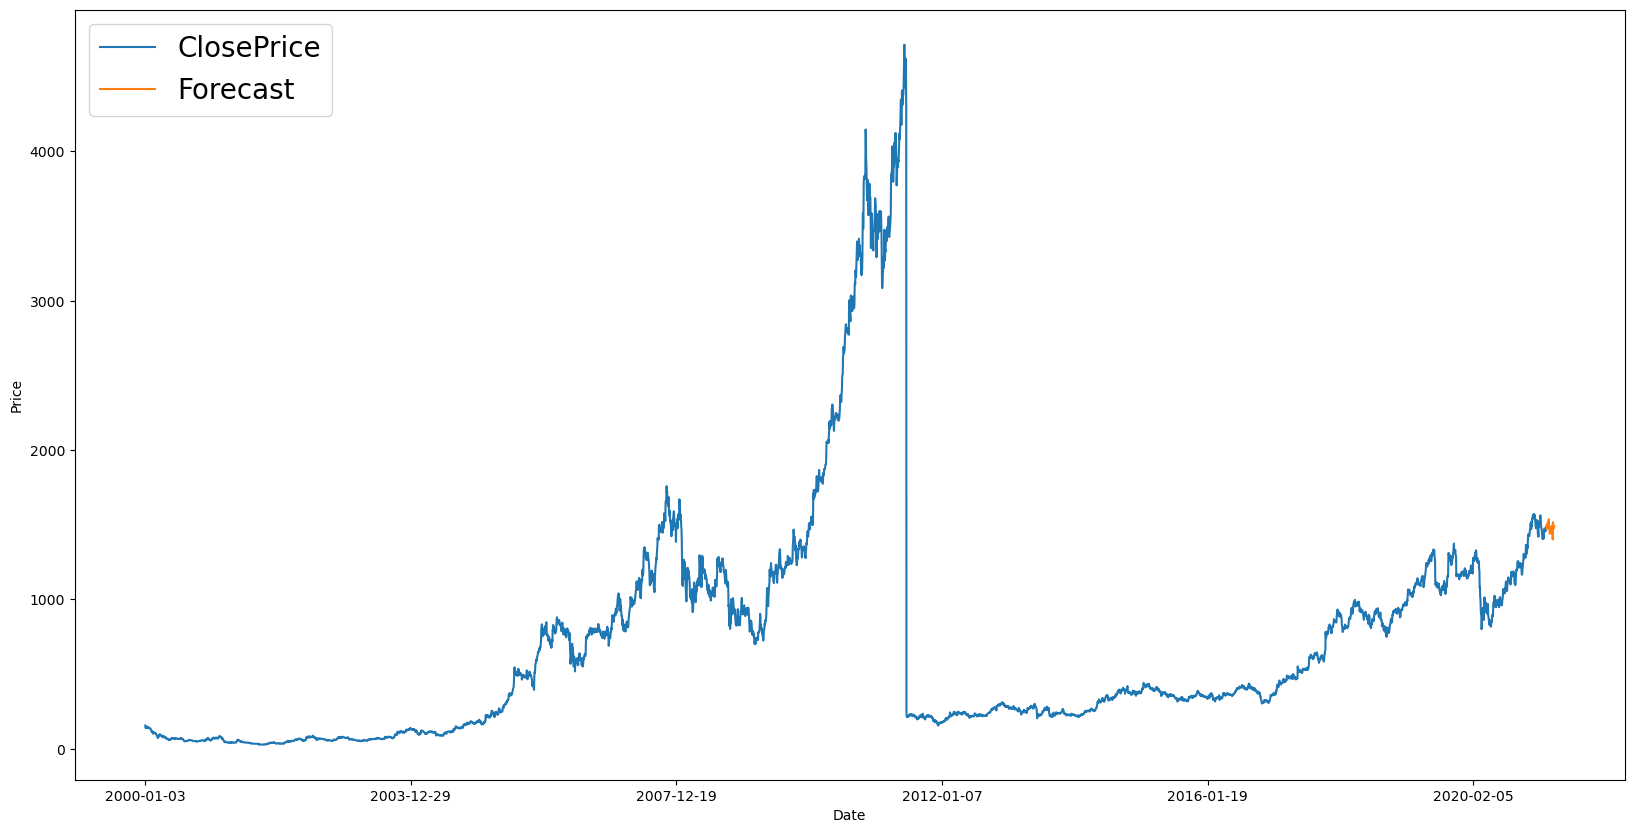

In [282]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')